In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('df_filtered.csv', index_col=0)
df_LCU = df[df.Element == 'Producer Price (LCU/tonne)'].reset_index(drop=True)
df_USD = df[df.Element == 'Producer Price (USD/tonne)'].reset_index(drop=True)
df_PPI = df[df.Element == 'Producer Price Index (2014-2016 = 100)'].reset_index(drop=True)
all_df = [df_LCU, df_USD, df_PPI]

In [2]:
df = pd.read_csv('malaysia_produce.csv')
df_LCU, df_SLC, df_USD, df_PPI = [df[df.Element == 'Producer Price (LCU/tonne)'], 
df[df.Element == 'Producer Price (SLC/tonne)'],
df[df.Element == 'Producer Price (USD/tonne)'], df[df.Element == 'Producer Price Index (2014-2016 = 100)']]

## Overall Distribution of Data Field by Year

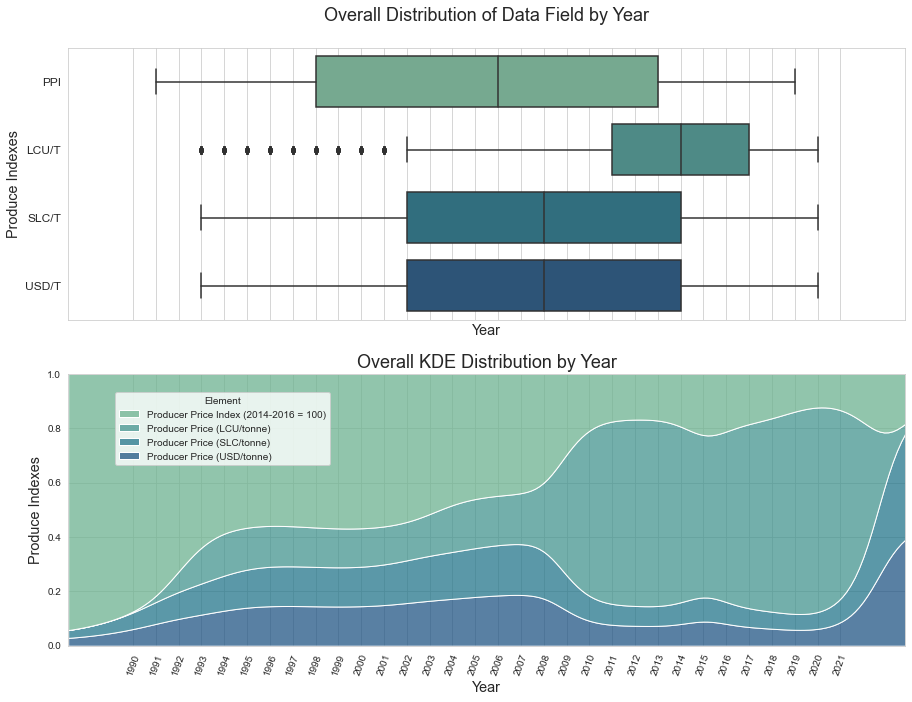

In [5]:
#Setting up figure
plt.rcParams["figure.figsize"] = (15,11)
f, ax = plt.subplots(2, sharex=True)

#Plotting Box Plot of Distribution of Produce Index by Year
sns.boxplot(
    data=df, 
    x = 'Year', 
    y = 'Element', 
    width = 0.75, 
    palette= 'crest', 
    ax= ax[0]
)
ax[0].set_xticks(np.arange(1990, 2022 ,1))
ax[0].set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
ax[0].set_yticklabels(['PPI', 'LCU/T', 'SLC/T', 'USD/T'],rotation = 0, fontsize = 'large')
ax[0].set_title('Overall Distribution of Data Field by Year\n', fontdict={'fontsize':18})
ax[0].set_xlabel('Year', fontsize = 'x-large')
ax[0].set_ylabel('Produce Indexes', fontsize = 'x-large')

#Plotting KDE Plot of Distribution of Produce Index by Year
sns.kdeplot(
    data = df, 
    x = 'Year', 
    hue = 'Element', 
    legend=True, 
    multiple = 'fill',
    palette= 'crest',
    ax = ax[1]
)
ax[1].set_xticks(np.arange(1990, 2022 ,1))
ax[1].set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
ax[1].set_title('Overall KDE Distribution by Year', fontdict={'fontsize':18})
ax[1].set_xlabel('Year', fontsize = 'x-large')
ax[1].set_ylabel('Produce Indexes', fontsize = 'x-large')
sns.move_legend(ax[1], bbox_to_anchor=(0.05, 0.95), loc='upper left')

plt.show()

## Joint Distribution of Price / Year

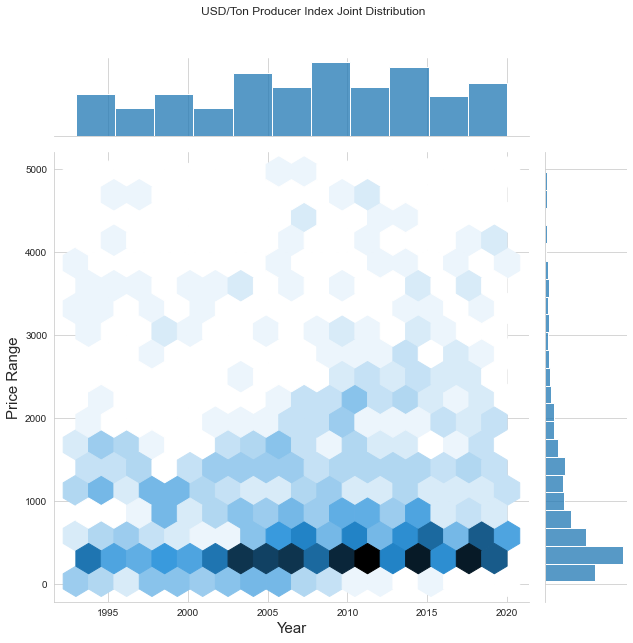

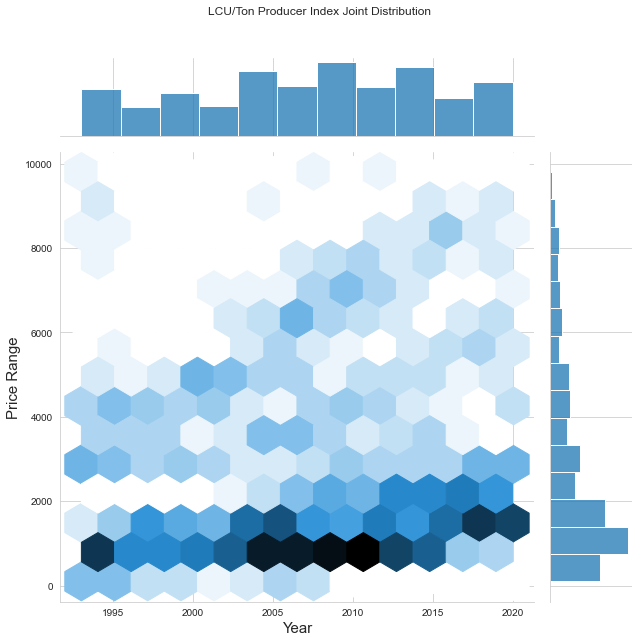

In [36]:
def jointplot_datafield(input_df, value_range, title): 
    #input_DF: DataFrame selection #value_range: Upper limit price range #title: Axes title
    plot1 = sns.jointplot(
        data= input_df[(input_df.Months == 'Annual value') & (input_df.Value < value_range)], 
        x = 'Year', 
        y = 'Value', 
        kind = 'hex', 
        height = 9,
        palette= 'crest'
    )
    
    plot1.ax_joint.set_xlabel('Year', fontsize = '15')
    plot1.ax_joint.set_ylabel('Price Range', fontsize = '15')
    
    plot1.fig.suptitle(title)
    #plot1.ax_joint.collections[0].set_alpha(0)
    #plot1.fig.tight_layout()
    plot1.fig.subplots_adjust(top=0.90, left=0.10)
    plt.show()
    
jointplot_datafield(df_USD, 5000, 'USD/Ton Producer Index Joint Distribution')
jointplot_datafield(df_LCU, 10000, 'LCU/Ton Producer Index Joint Distribution')

### Boxplot Yearly Distribution of Produces

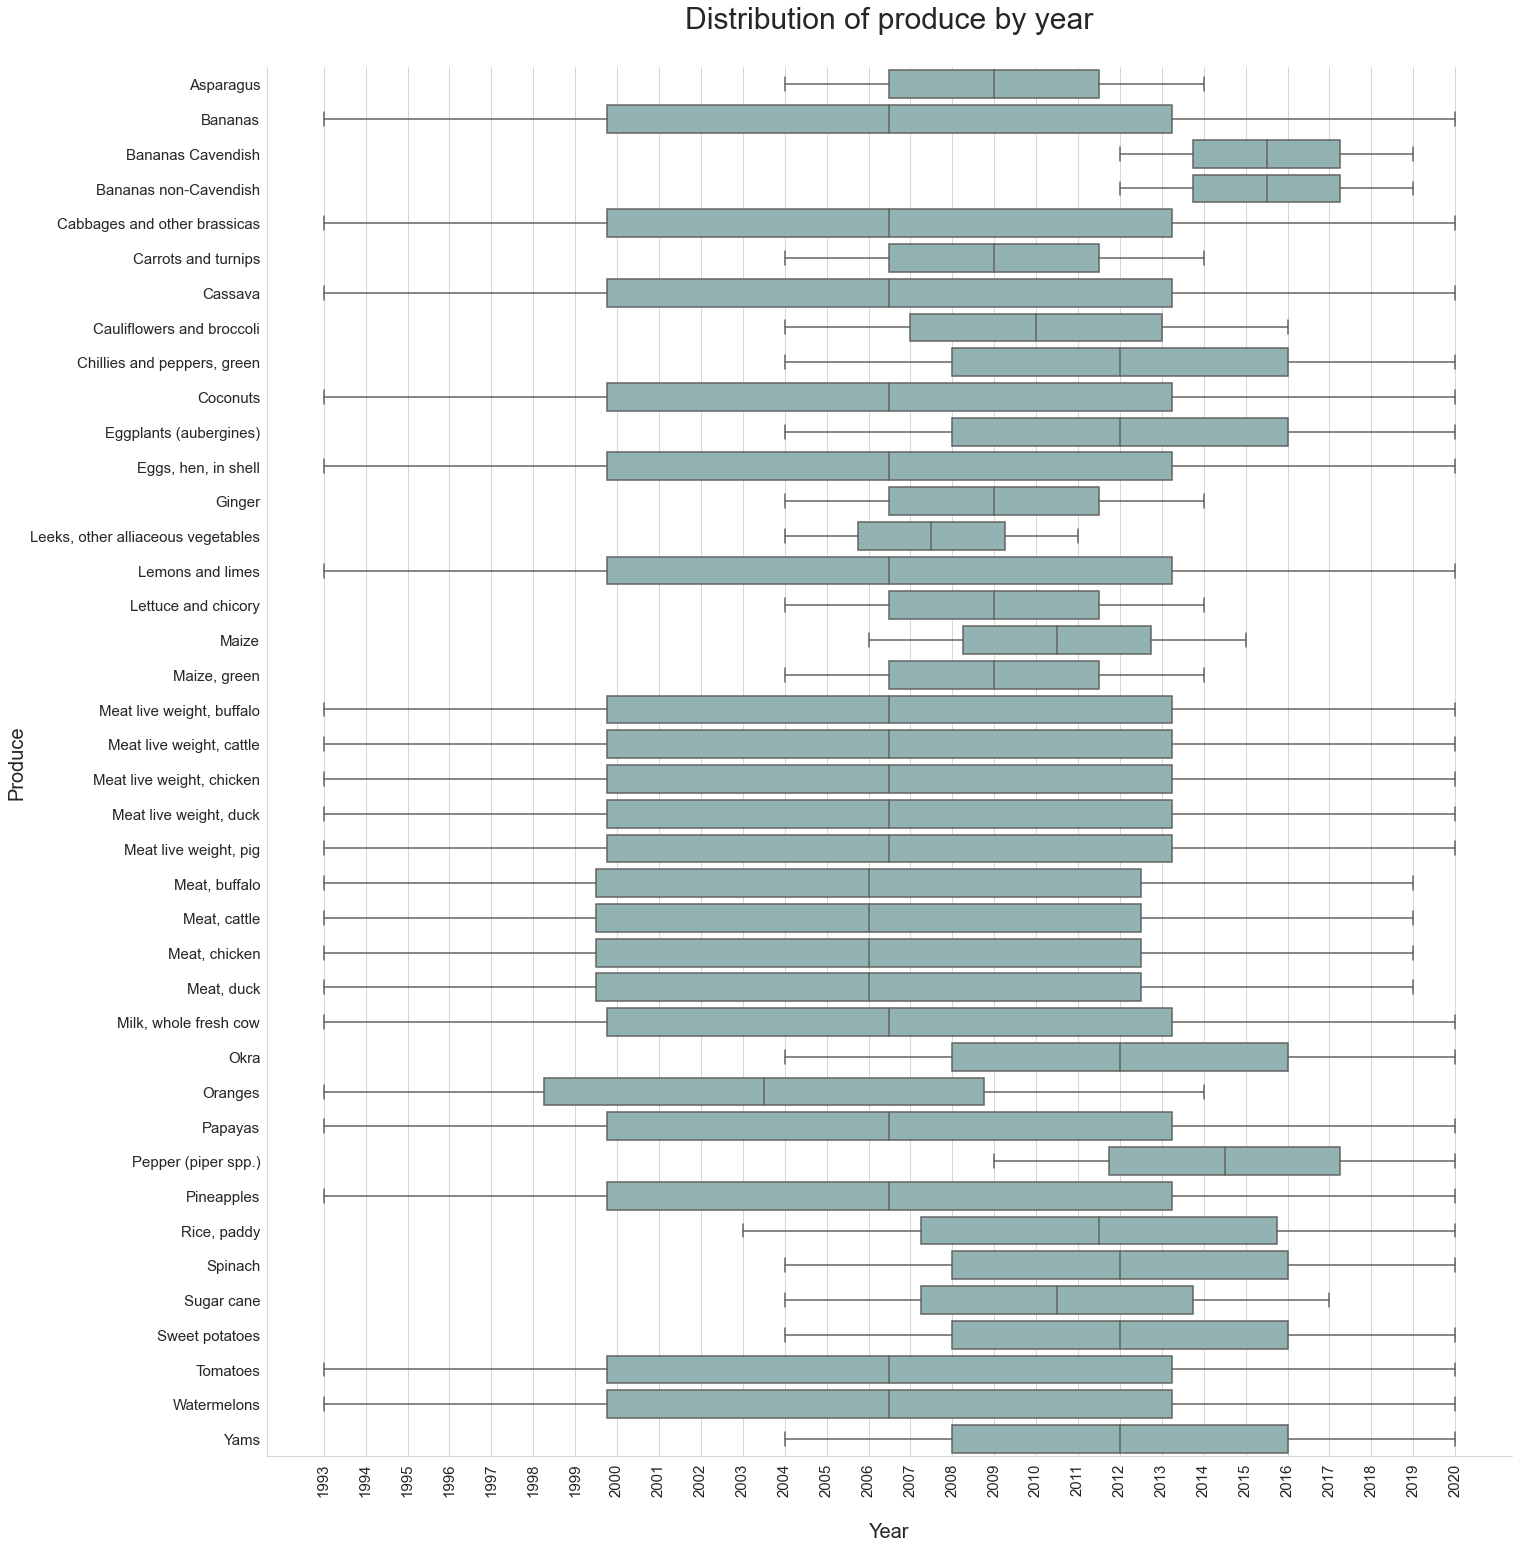

In [43]:
g = sns.catplot(
    data = df_USD, #Datafield input customizable
    y = 'Item',
    x = 'Year',
    #aspect = 2.5,
    height = 20,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_title('Distribution of produce by year\n', fontdict={'fontsize':30})
g.ax.set_yticklabels(df_USD.Item.unique(), fontsize = '15')
g.ax.set_ylabel('Produce', fontsize = '20')
g.ax.set_xlabel('\nYear', fontsize = '20')
g.ax.set_xticks(df_USD.Year.unique())
g.ax.set_xticklabels(df_USD.Year.unique(), rotation = 90, fontsize = '15')
plt.show()

### Boxplot Price Distribution of Produces

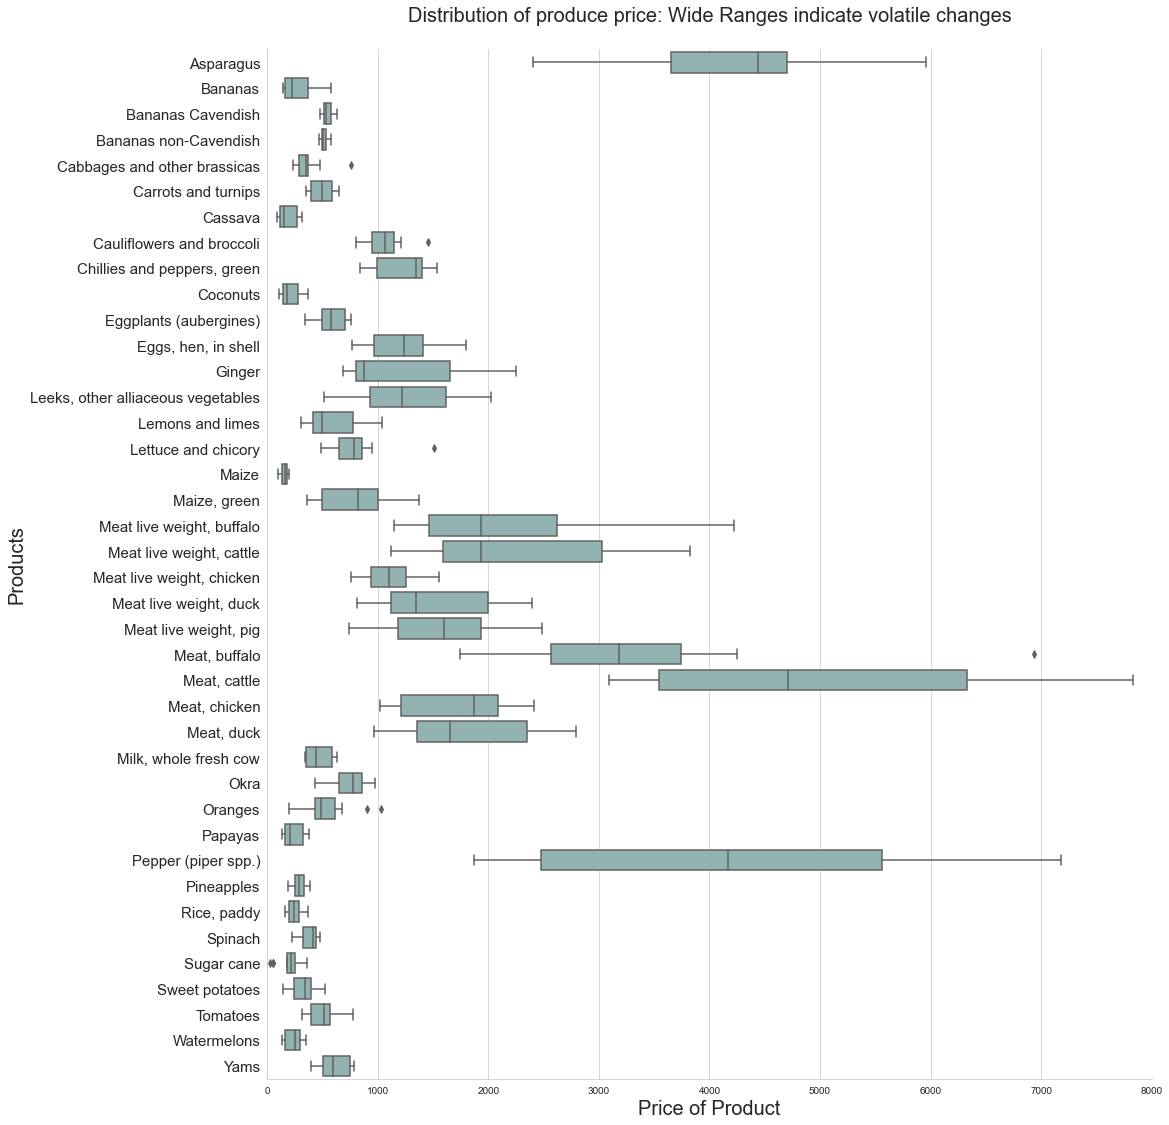

In [38]:
g = sns.catplot(
    data = df_USD, #Datafield input customizable
    y = 'Item',
    x = 'Value',
    aspect = 1,
    height = 15,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_title('Distribution of produce price: Wide Ranges indicate volatile changes\n', fontdict={'fontsize':20})
g.ax.set_yticklabels(df_USD.Item.unique(), fontsize = '15')
g.ax.set_ylabel("Products",fontsize = '20')
g.ax.set_xlabel("Price of Product",fontsize = '20')
g.set(xlim=(0, 8000))
plt.show()